In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet
from geopandas.plotting import plot_polygon_collection
import tilemapbase
tilemapbase.init(create=True)
import folium
from folium.features import DivIcon
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.colors as mcolors
import seaborn as sns

Kyoto_grid = pd.read_csv('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/grid_data/QDDSWQ5235/Kyoto_grid.csv')


In [3]:
# Seabornのカラーパレットを取得
palette = sns.color_palette("Reds", 6)  # 例として "deep" パレットを使用

# カラーパレットの各色をhex値に変換
hex_values = [mcolors.to_hex(color) for color in palette]

# 結果の表示
print(hex_values)

['#fedbcc', '#fcaf93', '#fc8161', '#f44f39', '#d52221', '#aa1016']


In [24]:
# 透過度（Alpha値）を0.8に設定
alpha_value = 0.8

# 各色に透過度を追加した新しいカラーパレットを作成
transparent_palette = [(r, g, b, alpha_value) for r, g, b in palette]


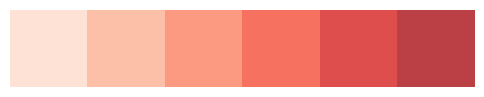

In [27]:
palette = sns.color_palette("Reds", 6)

# 透過度（Alpha値）を0.8に設定
alpha_value = 0.8

# 各色に透過度を追加した新しいカラーパレットを作成
transparent_palette = [(r, g, b, alpha_value) for r, g, b in palette]

# カラーパレットをMatplotlibのimshowを使用して表示
fig, ax = plt.subplots(figsize=(6, 1))
ax.imshow([transparent_palette], aspect='auto', cmap='viridis')

# 不要な軸を非表示にする
ax.axis('off')

# グラフを表示
plt.show()

In [4]:

Kyoto_residents_max = Kyoto_grid['residents'].max()
Kyoto_residents_min = Kyoto_grid['residents'].min()


In [5]:
interval_values = np.linspace(Kyoto_residents_min, Kyoto_residents_max, 7)
interval_values

array([1.00000000e+00, 3.47616667e+03, 6.95133333e+03, 1.04265000e+04,
       1.39016667e+04, 1.73768333e+04, 2.08520000e+04])

In [6]:
def find_interval(number, interval_values):
    """
    入力された数字がinterval_valuesのどの範囲に属するかを判定する関数

    Parameters:
    - number: 判定する数字
    - interval_values: 区間の配列

    Returns:
    - interval: 数字が属する区間（例: (0, 20)）
    """
    for i in range(len(interval_values) - 1):
        if interval_values[i] <= number <= interval_values[i + 1]:
            return i
    # 数字がどの範囲にも属さない場合
    return None

In [7]:
Kyoto_grid['color_num'] = Kyoto_grid['residents'].apply(lambda x: find_interval(x, interval_values))

In [8]:
Tokyo_map = folium.Map(location=[35.690921, 139.700258], zoom_start=15)
folium.TileLayer('cartodbpositron').add_to(Tokyo_map)
meth_list=[53394611, 52353680, 52354610, 52354642, 52354513, 52354548, 52353692, 52354519, 52353579]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
place_list = ['Tokyo Staion', 'Kyoto Station', 'Nakagyo ward', 'Kyoto university', 'Arashiyama', 'Kinkaku-ji temple', 'Kiyomizu-dera temple', 'Nijo-jo castle', 'To-ji temple']
place_snwe = [[35.675, 139.7625, 35.683333333333, 139.775],
              [34.983333333333, 135.75, 34.99166666666, 135.7625],
              [35.008333333333, 135.75, 35.016666666667, 135.7625],
              [35.033333333333, 135.775, 35.041666666667, 135.7875],
              [35.008333333333, 135.6625, 35.016666666667, 135.675],
              [35.033333333333, 135.725, 35.041666666667, 135.7375],
              [34.991666666667, 135.775, 35, 135.7875],
              [35.008333333333, 135.7375, 35.01666666666, 135.75],
              [34.975, 135.7375, 34.983333333333, 135.75]]

for idx, snwe in enumerate(place_snwe):
    s = snwe[0]
    w = snwe[1]
    n = snwe[2]
    e = snwe[3]



    folium.Polygon(
        locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
        color="red", # 線の色
        weight=5, # 線の太さ
        fill=False, # 塗りつぶす
        fill_opacity=0.5, # 透明度（1=不透明）
    ).add_to(Tokyo_map)



    folium.Marker(location=[(s+n)/2 + 0.004, (w+e)/2 - 0.005], icon=DivIcon(
        icon_size=(80, 25),
        icon_anchor=(0, 0),
        html='<div style="text-align: left; font-size: 15pt; color : black width: 100px; height: 25px, font-weight: 1000">'+ place_list[idx] +'</div>')
    ).add_to(Tokyo_map)


In [9]:
Kyoto_map = folium.Map(location=[34.983333333333, 135.75], zoom_start=15)
folium.TileLayer('cartodbpositron').add_to(Kyoto_map)
meth_list=[53394611, 52353680, 52354610, 52354642, 52354513, 52354548, 52353692, 52354519, 52353579]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
place_list = ['Tokyo Staion', 'Kyoto Station', 'Nakagyo Ward', 'Kyoto University', 'Arashiyama', 'Kinkaku-ji temple', 'Kiyomizu-dera temple', 'Nijo-jo castle', 'To-ji temple']
place_snwe = [[35.675, 139.7625, 35.683333333333, 139.775],
              [34.983333333333, 135.75, 34.99166666666, 135.7625],
              [35.008333333333, 135.75, 35.016666666667, 135.7625],
              [35.033333333333, 135.775, 35.041666666667, 135.7875],
              [35.008333333333, 135.6625, 35.016666666667, 135.675],
              [35.033333333333, 135.725, 35.041666666667, 135.7375],
              [34.991666666667, 135.775, 35, 135.7875],
              [35.008333333333, 135.7375, 35.01666666666, 135.75],
              [34.975, 135.7375, 34.983333333333, 135.75]]

for i in range(len(Kyoto_grid)):
    s = Kyoto_grid.miny[i]
    w = Kyoto_grid.minx[i]
    n = Kyoto_grid.maxy[i]
    e = Kyoto_grid.maxx[i]


    if pd.isna(Kyoto_grid['color_num'][i]):  # もしくは df['num'].isna().iloc[i] でも可
        folium.Polygon(
            color = 'black',
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            weight=1, # 線の太さ
            fill=False, # 塗りつぶす
            fill_opacity=0.5, # 透明度（1=不透明）
        ).add_to(Kyoto_map)
    else:
        folium.Polygon(
            color=hex_values[int(Kyoto_grid['color_num'][i])],
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            weight=1, # 線の太さ
            fill=True, # 塗りつぶす
            fill_opacity=0.8, # 透明度（1=不透明）
        ).add_to(Kyoto_map)

for idx, snwe in enumerate(place_snwe):
    s = snwe[0]
    w = snwe[1]
    n = snwe[2]
    e = snwe[3]



    folium.Polygon(
        locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
        color="blue", # 線の色
        weight=2, # 線の太さ
    ).add_to(Kyoto_map)



    folium.Marker(location=[(s+n)/2 + 0.004, (w+e)/2 - 0.005], icon=DivIcon(
        icon_size=(80, 25),
        icon_anchor=(0, 0),
        html='<div style="text-align: left; font-size: 20pt; color : black width: 1000px; height: 100px, font-weight: 1000">'+ place_list[idx] +'</div>')
    ).add_to(Kyoto_map)
Kyoto_map

In [21]:
Kyoto_map = folium.Map(location=[34.983333333333, 135.75], zoom_start=15)
folium.TileLayer('openstreetmap').add_to(Kyoto_map)
meth_list=[53394611, 52353680, 52354610, 52354642, 52354513, 52354548, 52353692, 52354519, 52353579]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
place_list = ['Tokyo Staion', 'Kyoto Station', 'Nakagyo Ward', 'Kyoto University', 'Arashiyama', 'Kinkaku-ji temple', 'Kiyomizu-dera temple', 'Nijo-jo castle', 'To-ji temple']
place_snwe = [[35.675, 139.7625, 35.683333333333, 139.775],
              [34.983333333333, 135.75, 34.99166666666, 135.7625],
              [35.008333333333, 135.75, 35.016666666667, 135.7625],
              [35.033333333333, 135.775, 35.041666666667, 135.7875],
              [35.008333333333, 135.6625, 35.016666666667, 135.675],
              [35.033333333333, 135.725, 35.041666666667, 135.7375],
              [34.991666666667, 135.775, 35, 135.7875],
              [35.008333333333, 135.7375, 35.01666666666, 135.75],
              [34.975, 135.7375, 34.983333333333, 135.75]]

for i in range(len(Kyoto_grid)):
    s = Kyoto_grid.miny[i]
    w = Kyoto_grid.minx[i]
    n = Kyoto_grid.maxy[i]
    e = Kyoto_grid.maxx[i]

    if Kyoto_grid.key[i] in meth_list:

        folium.Polygon(
            color=hex_values[int(Kyoto_grid['color_num'][i])],
            locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
            weight=1, # 線の太さ
            fill=True, # 塗りつぶす
            fill_opacity=0.8, # 透明度（1=不透明）
        ).add_to(Kyoto_map)

for idx, snwe in enumerate(place_snwe):
    s = snwe[0]
    w = snwe[1]
    n = snwe[2]
    e = snwe[3]



    folium.Polygon(
        locations=[[s,w], [s,e], [n,e], [n,w]], # 多角形の頂点
        color="black", # 線の色
        weight=2, # 線の太さ
    ).add_to(Kyoto_map)



    # folium.Marker(location=[(s+n)/2 + 0.004, (w+e)/2 - 0.005], icon=DivIcon(
    #     icon_size=(80, 25),
    #     icon_anchor=(0, 0),
    #     html='<div style="text-align: left; font-size: 20pt; color : black width: 1000px; height: 100px, font-weight: 1000">'+ place_list[idx] +'</div>')
    # ).add_to(Kyoto_map)
Kyoto_map